In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np
from sklearn.datasets import load_diabetes

diabetes_db  = load_diabetes()
print(diabetes_db.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
x = torch.tensor(diabetes_db.data, dtype=torch.float32)
y = torch.tensor(diabetes_db.target, dtype=torch.float32)

In [3]:
# Divide the data into a training set (80%) and a test set (20%)
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

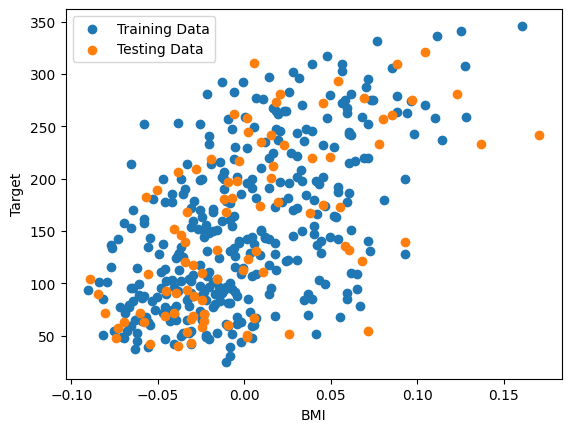

In [4]:
# Plot the 'bmi' feature in relationship with the target 'y'
plt.scatter(x_train[:, 2], y_train, label="Training Data")
plt.scatter(x_test[:, 2], y_test, label="Testing Data")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.legend()
plt.show()

In [5]:
import torch.nn as nn

# Define a custom linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


In [6]:
# Create an instance of the model
model = LinearRegressionModel(input_size=10)

In [7]:
# Create an optimizer (e.g., SGD) and set a learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
training_losses = []
testing_losses = []

n_itr = 10000

for i in range(n_itr):
    # Train
    model.train()
    
    # Forward propagation
    outputs = model(x_train)
    
    # Calculate the loss using mean absolute error
    loss = torch.mean(torch.abs(outputs - y_train))
    
    training_losses.append(loss.item())
    
    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    
    # Update the model's parameters using gradient descent
    optimizer.step()

    # Evaluate, calculate the testing loss
    model.eval()
    test_outputs = model(x_test)
    test_loss = torch.mean(torch.abs(test_outputs - y_test))
    testing_losses.append(test_loss.item())

    # Print intermediate losses for certain iterations
    if i % 100 == 1:
        print('Iteration: %04d | Training loss: %f | Testing loss: %f' % (i, loss.item(), test_loss.item()))

Iteration: 0001 | Training loss: 151.189484 | Testing loss: 154.429520
Iteration: 0101 | Training loss: 150.189468 | Testing loss: 153.429535
Iteration: 0201 | Training loss: 149.189484 | Testing loss: 152.429550
Iteration: 0301 | Training loss: 148.189468 | Testing loss: 151.429550
Iteration: 0401 | Training loss: 147.189468 | Testing loss: 150.429550
Iteration: 0501 | Training loss: 146.189438 | Testing loss: 149.429550
Iteration: 0601 | Training loss: 145.189423 | Testing loss: 148.429550
Iteration: 0701 | Training loss: 144.189392 | Testing loss: 147.429520
Iteration: 0801 | Training loss: 143.189362 | Testing loss: 146.429504
Iteration: 0901 | Training loss: 142.189346 | Testing loss: 145.429489
Iteration: 1001 | Training loss: 141.189301 | Testing loss: 144.429489
Iteration: 1101 | Training loss: 140.189285 | Testing loss: 143.429459
Iteration: 1201 | Training loss: 139.189255 | Testing loss: 142.429443
Iteration: 1301 | Training loss: 138.189255 | Testing loss: 141.429443
Iterat

KeyboardInterrupt: 

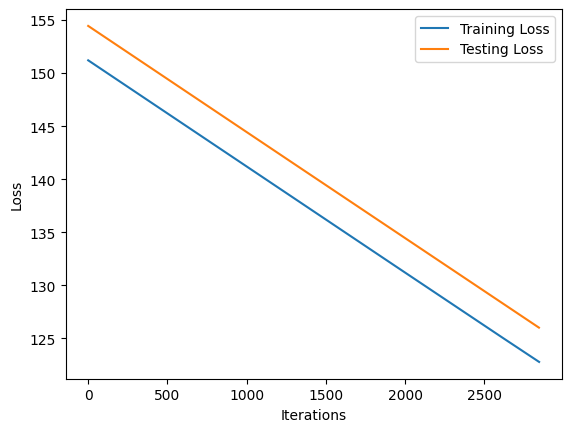

In [9]:
# Plot the training and testing loss curves
plt.plot(training_losses, label="Training Loss")
plt.plot(testing_losses, label="Testing Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

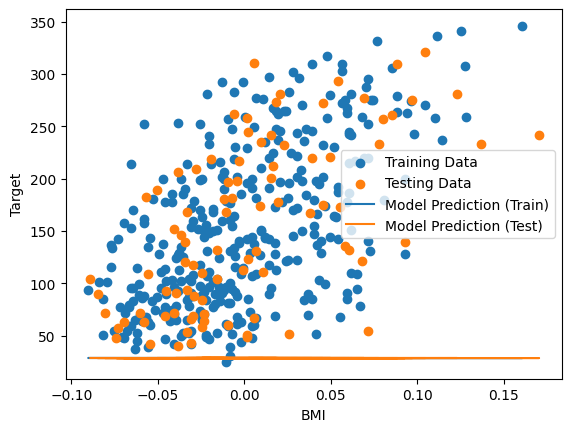

In [10]:
# Plot the training and testing data along with the model's predictions
plt.scatter(x_train[:, 2], y_train, label="Training Data")
plt.scatter(x_test[:, 2], y_test, label="Testing Data")
plt.plot(x_train[:, 2], model(x_train).detach().numpy(), label="Model Prediction (Train)")
plt.plot(x_test[:, 2], model(x_test).detach().numpy(), label="Model Prediction (Test)")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.legend()
plt.show()